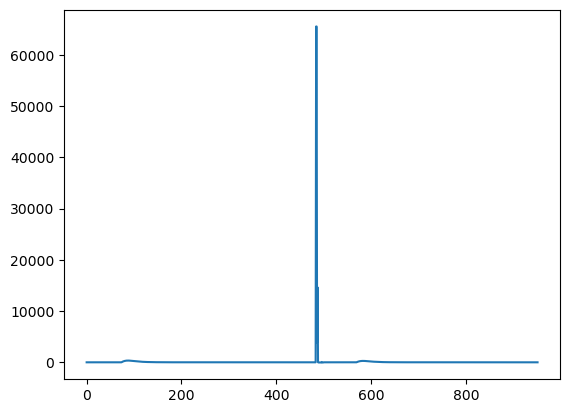

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f = open(r"C:\Users\hellmala\Desktop\stuff\DIG\digtest13")
a = np.fromfile(f, dtype=np.uint32)

state = 0
wave_len = 3000/2  # NUMBER OF SAMPLES (MUST BE DIVIDED BY 2 WHEN ONLY 1 CHANNEL IS ENABLE)
idx = 0
ch0 = []
filler_size = 1

for x in a:
    if state == 0:
        if x == 0xFFFFFFFF:
            state = 1
            start_counter = 0
            hits = 0
            user = 0
            ts = 0
            filler_cnt = filler_size
            wavec = wave_len
        else:
            print("DECODE ERROR")
    elif state == 1:
        ts = x
        state = 2
    elif state == 2:
        ts += x << 32
        state = 3
    elif state == 3:
        start_counter = x
        state = 4
    elif state == 4:
        hits = x
        state = 5
    elif state == 5:
        hits += x << 32
        state = 6
    elif state == 6:
        user = x
        if filler_cnt > 0:
            state = 7
        else:
            state = 8
    elif state == 7:
        filler_cnt = filler_cnt - 1
        if filler_cnt == 0:
            state = 8
    elif state == 8:
        if wavec == 1:
            state = 0
        else:
            ch0.append(x & 0xFFFF)
            ch0.append((x >> 16) & 0xFFFF)
            wavec = wavec - 1
        idx = idx + 1

fig, axes = plt.subplots(nrows=1, ncols=1)
axes.plot(ch0)
plt.show()
